In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib widget
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import davies_bouldin_score

In [3]:
data = pd.read_csv("/mnt/Data/code/machine_learning/course/intro_to_ML/intro_to_ML/project/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.drop(columns=["CUST_ID"], inplace=True)

In [6]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
print(data["CREDIT_LIMIT"].value_counts())
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0], inplace=True)

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64


In [8]:
print(data["MINIMUM_PAYMENTS"].value_counts())
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


In [9]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
len(data)

8950

BALANCE: yes
BALANCE_FREQUENCY: yes
PURCHASES: yes
ONEOFF_PURCHASES: yes
INSTALLMENTS_PURCHASES: yes
CASH_ADVANCE: yes
PURCHASES_FREQUENCY: no
ONEOFF_PURCHASES_FREQUENCY: yes
PURCHASES_INSTALLMENTS_FREQUENCY: no
CASH_ADVANCE_FREQUENCY: yes
CASH_ADVANCE_TRX: yes
PURCHASES_TRX: yes
CREDIT_LIMIT: yes
PAYMENTS: yes
MINIMUM_PAYMENTS: yes
PRC_FULL_PAYMENT: yes
TENURE: yes


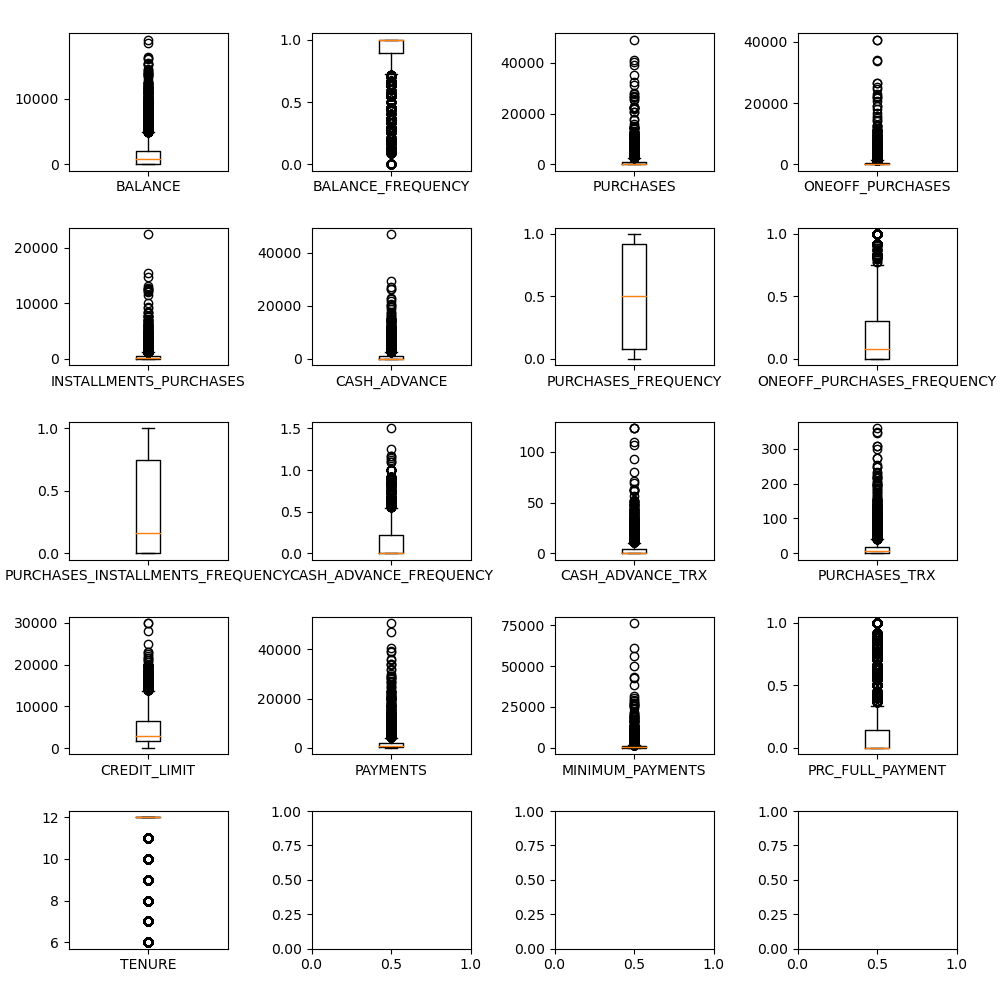

In [11]:
columns = data.columns
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.boxplot(data[column], labels=[column])

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    if data[(data[column] > upper) | (data[column] < lower)].any(axis=None):
        print(f"{column}: yes")
    else:
        print(f"{column}: no")
plt.show()

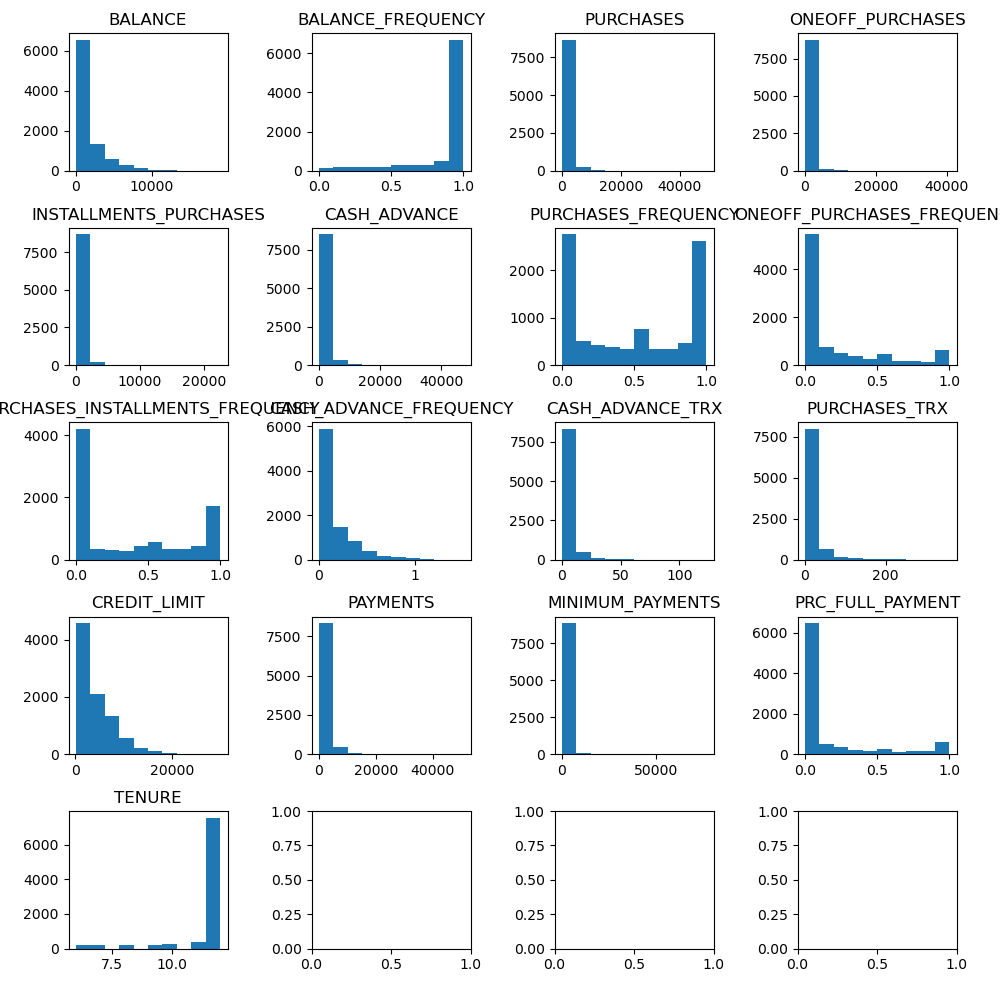

In [12]:
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.hist(data[column])
    ax.set_title(column)

In [13]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

data_log = log_transformer.transform(data)
data_log = pd.DataFrame(data_log, columns=columns)
data_log

/home/aung/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,6.762968,0.000000,1.945910
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


BALANCE: yes
BALANCE_FREQUENCY: yes
PURCHASES: no
ONEOFF_PURCHASES: no
INSTALLMENTS_PURCHASES: no
CASH_ADVANCE: no
PURCHASES_FREQUENCY: no
ONEOFF_PURCHASES_FREQUENCY: yes
PURCHASES_INSTALLMENTS_FREQUENCY: no
CASH_ADVANCE_FREQUENCY: yes
CASH_ADVANCE_TRX: yes
PURCHASES_TRX: no
CREDIT_LIMIT: yes
PAYMENTS: yes
MINIMUM_PAYMENTS: yes
PRC_FULL_PAYMENT: yes
TENURE: yes


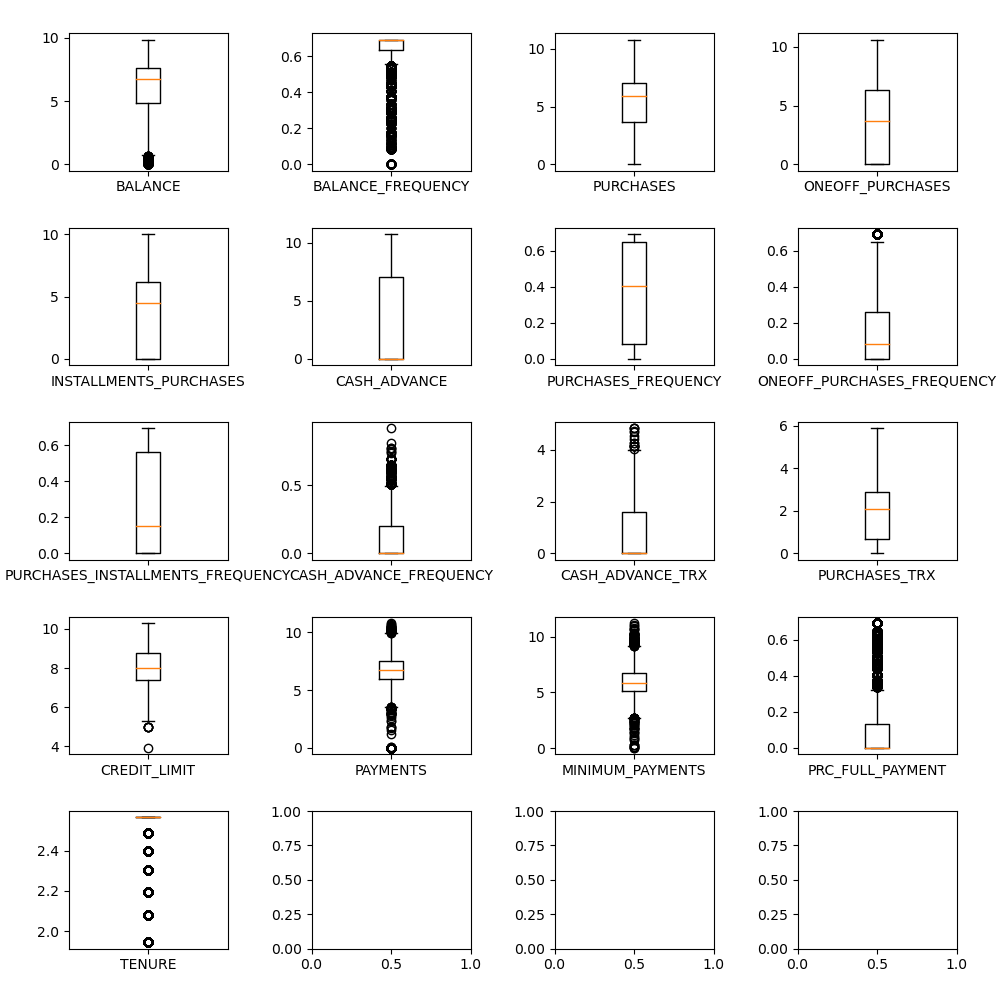

In [14]:
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.boxplot(data_log[column], labels=[column])

    Q1 = data_log[column].quantile(0.25)
    Q3 = data_log[column].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    if data_log[(data_log[column] > upper) | (data_log[column] < lower)].any(axis=None):
        print(f"{column}: yes")
    else:
        print(f"{column}: no")
plt.show()

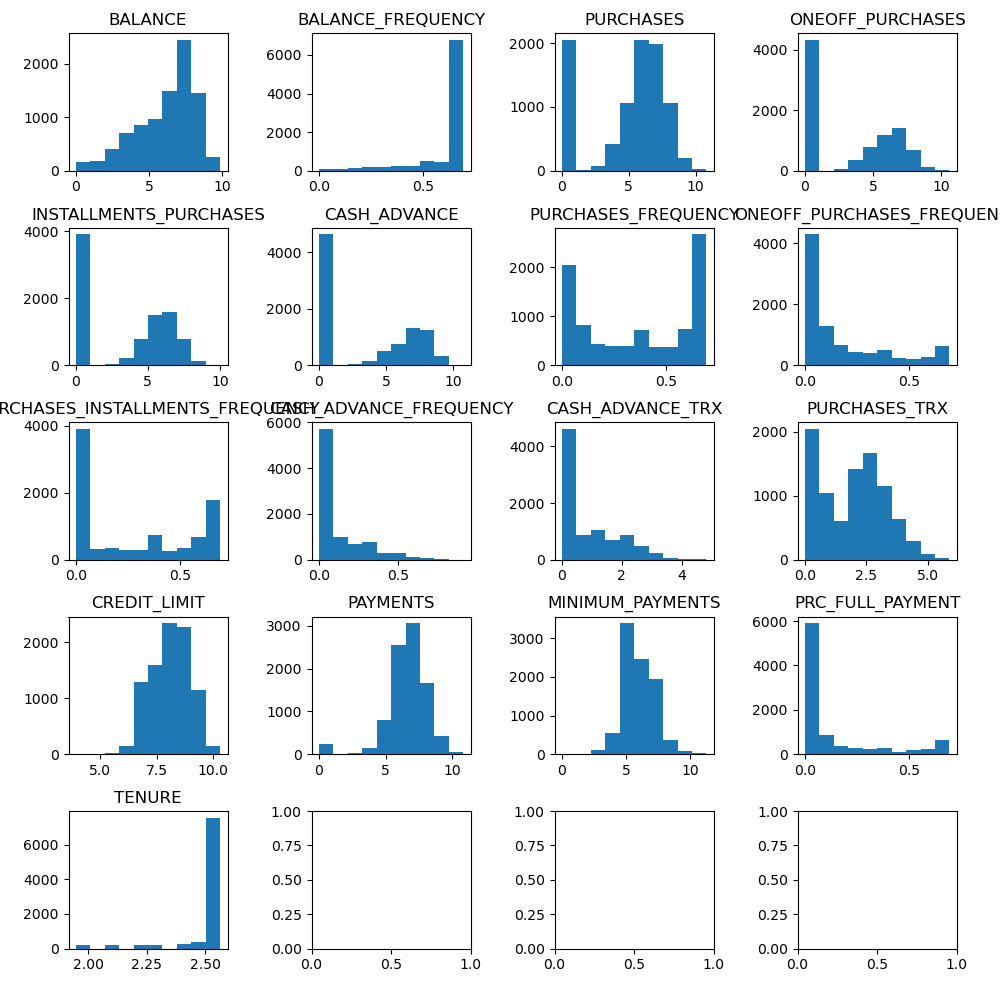

In [15]:
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.hist(data_log[column])
    ax.set_title(column)

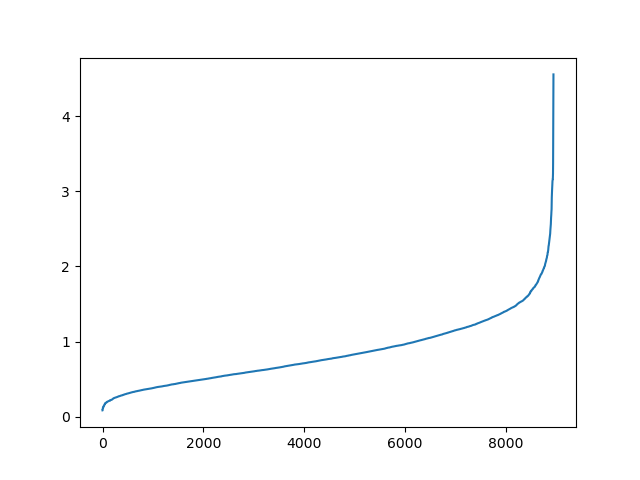

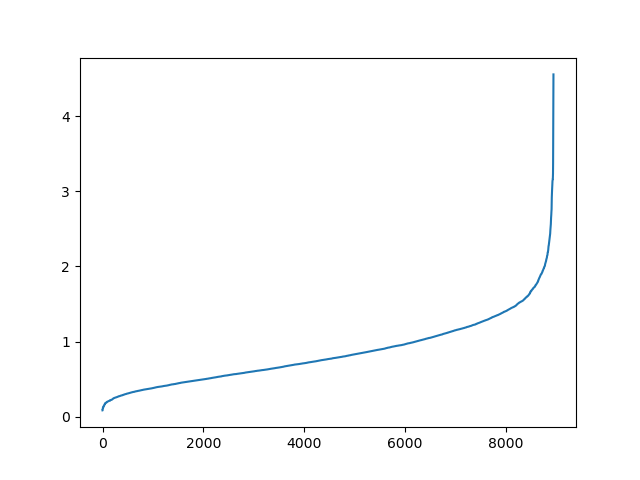

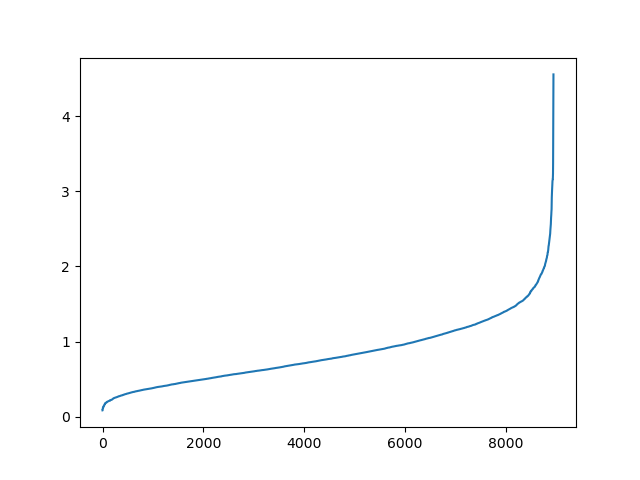

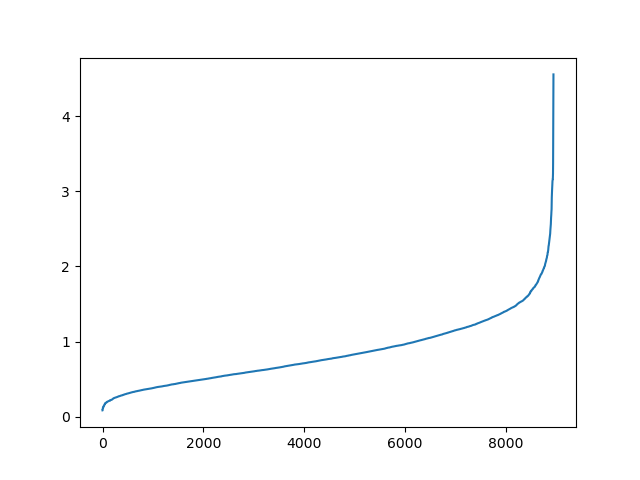

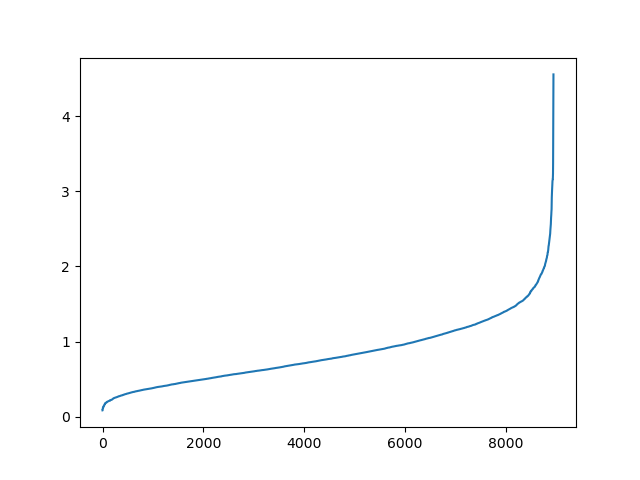

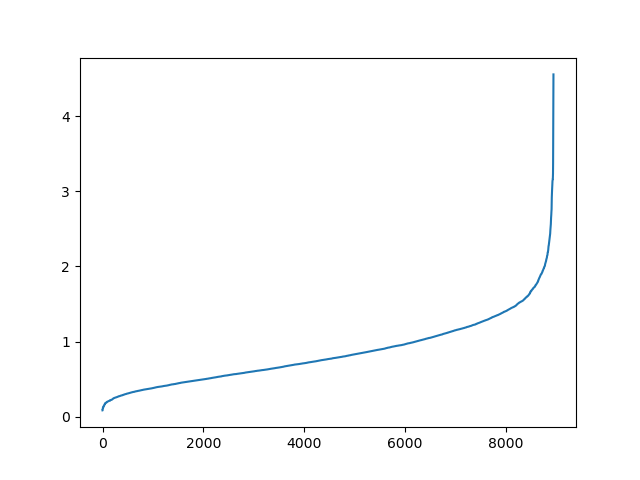

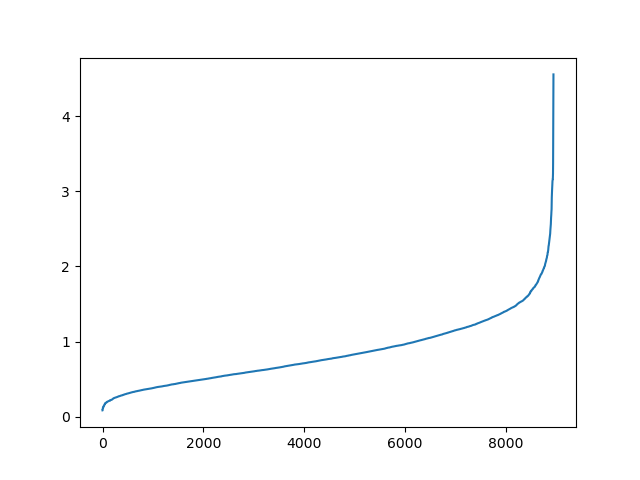

In [16]:
min_pts = [5, 10, 50, 100, 150, 200, 250]
eps_vals = list()

for min_pt in min_pts:
    neighbors = NearestNeighbors(n_neighbors=min_pt)
    neighbors_fit = neighbors.fit(data_log)

    distances, indices = neighbors_fit.kneighbors(data_log)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    indices = range(0, len(distances))

    kneedle = KneeLocator(indices, distances, curve='convex', direction='increasing')
    eps_vals.append(distances[kneedle.elbow])

    fig = plt.figure()
    plt.plot(indices, distances)
    plt.show()

In [17]:
score_history = dict()
for minpt, eps in zip(min_pts, eps_vals):
    print(f"MinPts: {minpt}, Eps: {eps}")

    dbscan = DBSCAN(eps=eps, min_samples=minpt)
    y_pred = dbscan.fit_predict(data_log)
    n_cluster = len(set(y_pred)) - (1 if -1 in y_pred else 0)

    score = davies_bouldin_score(data, y_pred)
    score_history[n_cluster] = score

    print(f"Number of clusters: {n_cluster}")

MinPts: 5, Eps: 2.2739088637410734
Number of clusters: 12
MinPts: 10, Eps: 2.2739088637410734
Number of clusters: 8
MinPts: 50, Eps: 2.2739088637410734
Number of clusters: 7
MinPts: 100, Eps: 2.2739088637410734
Number of clusters: 7
MinPts: 150, Eps: 2.2739088637410734
Number of clusters: 6
MinPts: 200, Eps: 2.2739088637410734
Number of clusters: 4
MinPts: 250, Eps: 2.2739088637410734
Number of clusters: 4


4


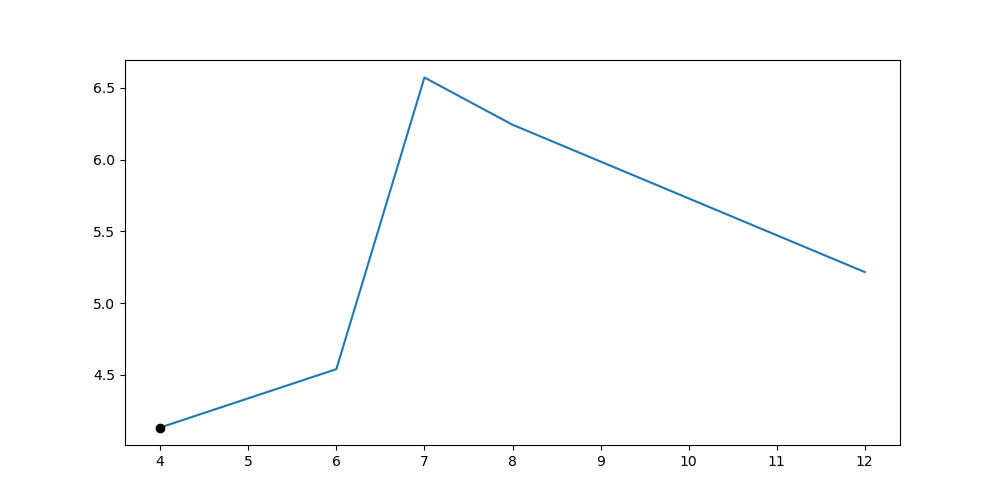

In [18]:
x = list(score_history.keys())
y = list(score_history.values())

num_cluster = x[np.argmin(y)]
print(num_cluster)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(np.arange(2,20, 1))
plt.plot(num_cluster, min(y), 'ko')
plt.show()

In [20]:
dbscan = DBSCAN(eps=eps_vals[4], min_samples=min_pts[4])
y_pred = dbscan.fit_predict(data_log).reshape(-1, 1)
np.unique(y_pred, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([2456, 1602, 1887, 1613,  857,  351,  184]))

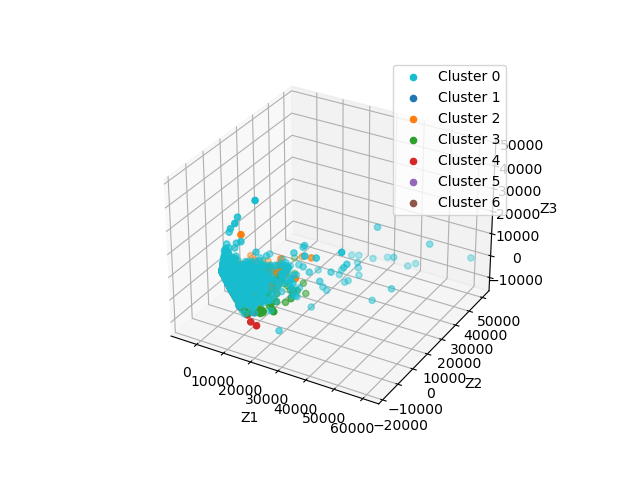

In [22]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)
X = np.concatenate([X_reduced, y_pred], axis=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = list(mcolors.TABLEAU_COLORS.keys())
for k in range(-1,6):
    rows = np.where(X[:, 3] == k)
    ax.scatter3D(X[rows][:, 0], X[rows][:, 1], X[rows][:, 2], label=f"Cluster {k+1}", color=colors[k])
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend()
plt.show()